# The cosmological density field

## Contents
* density fields
* 2-point correlation function
* power spectrum
* shot noise
* galaxy bias (not for now)
* what happens on the sphere?
    **[Oliver Friedrich p292](https://edoc.ub.uni-muenchen.de/23401/1/Friedrich_Oliver.pdf#page=292&zoom=100,57,501)
* angular power spectrum, a_{lm} coeffs

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_wireframe(ax):
  # terrifying function to plot the edges of a cube.
  Z = 1.1 * np.array([[-1,+1,-1], [+1,+1,-1], 
                      [+1,-1,-1], [-1,-1,-1], 
                      [-1,+1,+1], [+1,+1,+1], 
                      [+1,-1,+1], [-1,-1,+1]])
  verts = [[Z[0],Z[1],Z[2],Z[3]],
           [Z[4],Z[5],Z[6],Z[7]],
           [Z[0],Z[1],Z[5],Z[4]],
           [Z[2],Z[3],Z[7],Z[6]], 
           [Z[1],Z[2],Z[6],Z[5]],
           [Z[4],Z[7],Z[3],Z[0]]] # return verts
  ax.add_collection3d(
      Poly3DCollection(
          verts, 
          facecolors=(0.,0.,0.,0.),
          linewidths=1., 
          edgecolors='k'
      )
  )

    
def plot_points(ax, points):
    x, y, z = points.T
    p = ax.scatter(x, y, z, c='royalblue', s=1.0, alpha=0.5)
    ax.axis('off')
    ax.dist = 10.0
    
    
def plot_grid(ax, grid):
    line = np.linspace(-1.0, 1.0, grid.shape[0])
    mesh = np.meshgrid(line, line, line)
    mesh = np.vstack(map(np.ravel, mesh)).T
    cube = np.concatenate((mesh, grid.reshape(-1,1)), axis=1)
    
    x, y, z, c = cube.T
    p = ax.scatter(x, y, z, c=c, cmap='gray_r', s=0.05, alpha=0.5) 
    ax.axis('off')
    ax.dist = 10.0

    
def plot_3d(R):
  # show the sphere in three-dimensional space
  fig = plt.figure(figsize=(2.,2.), dpi=400)

  ax1 = fig.add_subplot(111, projection='3d')
  # ax1.set_title('training', y=1.05)
  plot_wireframe(ax1)
  plot_grid(ax1, R)
    

def upscale(x, factor):
    up_x = np.zeros((factor * x.shape[0], factor * x.shape[1]))[::]
    return up_x

### Large scale structure (LSS)

#### Setting the scene
The study of LSS is the investigation within cosmology into the properties and evolution of density fluctuations in the Universe. Instead of quantifying the motions and properties of every single body in the cosmic domain, the simulated and observable data of LSS is studied statistically.

The $\Lambda\text{CDM}$ cosmological model proposes that small perturbations in the primordial density field evolve under the force of gravitation to form the structure we observe today in the cosmic web. The initial density fluctuations are the result of a period of accelerated expansion ('inflation'). These fluctuations have simple statistical properties from quantum origins. Inflation only predicts the statistical properties of the exact initial conditions of the Universe.


#### A statistical perspective
From a statistical point of view, the goal of the study of LSS is to accurately describe the probability distribution

$\mathcal{P}(\{\delta_N\})d\delta_1 ...d\delta_N$,

where each $\{\delta_N\}=\{\delta(x_N)\}$. The distribution is completely described by the moments

$\langle \delta_N^{l_N} \rangle = \int \delta_1^{l_1}...\delta_N^{l_N}\mathcal{P}(\{\delta_N\})d\delta_1 ... d\delta_N$,

where $\langle \cdot \rangle$ describes an ensemble average at a point $x$ for many realizations of a random process.

It is assumed that the primordial density field is a statistically homogeneous and isotropic Gaussian random field, in other words, that the density field is the outcome of some random process in the early Universe. The later stages of evolution through gravitation interaction introduce non-linearity. The evolution of Fourier modes in the $\mathbf{k}$-space density field is linked to this evolution. The initial field had 'random spatial phases' but these contain no information since they are completely random. Non-linearity generates correlated (non-random) phases that contain information about the spatial pattern of the fluctuations.

CMB - probe of fluctuations still in linear regime. A test of the level of primordial non-Gaussianity, without non-linear effects.

#### Gaussian random fields

A random field $\delta(\mathbf{x})$ is Gaussian if the distribution of the field values at an arbitrary set of $N$ points $\{\delta(\mathbf{x}_N)\}$ is an $N$-variate Gaussian:

$\mathcal{P}(\{\delta_N\}) = \left [(2\pi)^N \det (C)\right ]^{-1/2}\exp(-\frac{1}{2}\sum_{i,j}\delta_i(C^{-1})_{ij}\delta_j)$,

where $C_{ij} = \langle \delta_i \delta_j \rangle$. Note also that a Fourier transform of a Gaussian in $\mathbf{x}$ is a Gaussian in $\mathbf{k}$. In particular, the one-point distribution function of the field is

$\mathcal{P}(\delta)d\delta = (\sqrt{2\pi}\sigma)^{-1}\exp(\frac{-\delta^2}{2\sigma^2})$,

where $\sigma^2 = \langle\delta^2\rangle=\xi(0)$ is the variance of the density perturbation field. So for a Gaussian random field the $N$-point probability function $\mathcal{P}(\{\delta_N\})$ is completely specified by the two-point correlation function.

We can specify this distribution in $\mathbf{k}$-space (see later).

### the density field

Let $n(\mathbf{r})$ denote the observed *number density* of particles at position $\mathbf{r}$ in the observed field. The average of this quantity, $\bar{n}(\mathbf{r})$, is the *selection function* which is the expected mean number of particles at position $\mathbf{r}$ given the selection criteria of the survey.

The *overdensity* $\delta(\mathbf{r})$ of particles at position $\mathbf{r}$ is defined by 

$\delta(\mathbf{r}) = \frac{n(\mathbf{r}) - \bar{n}(\mathbf{r})}{\bar{n}(\mathbf{r})}$.

In [3]:
# load an example field from the Millennium Simulation
# SAGE catalogs (Springel et al. 2005, Croton et al. 2016)
# at redshift z=0.0
cube = np.load(os.path.join(os.getcwd(), 'cube_z0.npy'))

normalize = lambda x: (x - x.min()) / (x.max() - x.min())

cube = normalize(cube)

Npix = 256
grid, _ = np.histogramdd(
    cube[:,:-1],             # projection: ignore z axis
    bins=(Npix, Npix),       # grid output shape
    range=([0.,1.], [0.,1.])
)

# overdensity of grid: delta(r)
grid = grid / grid.mean() - 1.0

The cosmological density field $\delta(\mathbf{r})$ is the sum over a discrete number of Fourier modes 

$\delta_\mathbf{k}=A_\mathbf{k} + iB_\mathbf{k} = |\delta_\mathbf{k}|\exp(i\phi_\mathbf{k}) = |\delta_\mathbf{k}|\left [\cos(\phi_\mathbf{k}) + i\sin(\phi_\mathbf{k})\right ]$, 

where $|\delta_\mathbf{k}|$ and $\phi_\mathbf{k}$ are the amplitude and phase of the mode.

>How can we describe the cosmological overdensity field $\delta(\mathbf{x}, t)$ without specifying the value at every location in space time $\{\mathbf{r},t\}$?

The Fourier transform of the density field gives the field in Fourier space

$\delta_\mathbf{k} = \frac{1}{V}\int \delta(\mathbf{r})\exp(-i\mathbf{k}\cdot\mathbf{r}) \text{d}^3 \mathbf{r}$,

where $V$ is the volume that encloses the particles under consideration. This must not be infinite in size!

The density field in real space is then a superposition of a discrete set of Fourier modes. 

$\delta(\mathbf{r})=\sum \delta_\mathbf{k} \exp( i \mathbf{k} \cdot \mathbf{r})=\sum \delta^*_\mathbf{k} \exp( -i \mathbf{k} \cdot \mathbf{r})$.

Since the density field in position is real, we have that $\delta^*(\mathbf{k})=\delta(\mathbf{k})$. Again since the field is isotropic we have dependences on $\mathbf{k}$ switching to dependences on just $|\mathbf{k}|=k$.

For any large volume $V$ the expectation value of $\delta(\mathbf{k})$ is zero for all volumes $V$ and wavevectors $\mathbf{k}$. From different realizations of the density field there are variances in the Fourier space coefficients $|\delta(\mathbf{k})|$. This defines the *power spectrum*

$P(k) = \langle|\delta(\mathbf{k})|^2\rangle_{|\mathbf{k}|=k}$.

If the density field $\delta$ is a Gaussian random field (for our Universe Planck Collaboration et al., 2015a) then the Fourier modes are chosen independently from a Gaussian distribution. This means that the power spectrum contains *all* the information about the density field, because it is the Fourier transform of a 2-point statistic - the correlation function. 

> Did the universe really start
from a Gaussian field, or did higher-order correlations exist?

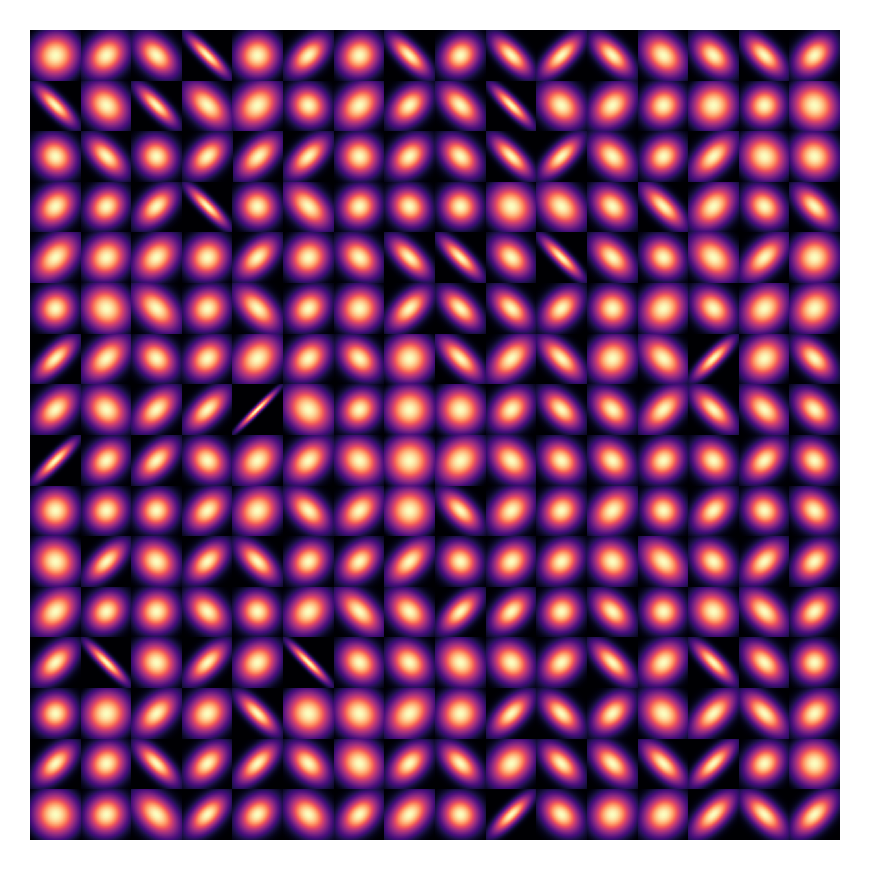

In [5]:
Nplt = 16
Npix = 128

fig, axs = plt.subplots(nrows=Nplt, ncols=Nplt, figsize=(3.,3.), dpi=300)

X = Y = np.linspace(-2.0, 2.0, Npix)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0], pos[:, :, 1] = X, Y

def multivariate_gaussian(pos, mu, sigma):
    n = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    N = np.sqrt((2.0 * np.pi) ** n * sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos - mu, sigma_inv, pos - mu)
    return np.exp(-1.0 * fac / 2.0) / N

for i in range(Nplt):
    for j in range(Nplt):
        mu = np.zeros((2))
        sigma = np.eye(2) 
        sigma[0,1], sigma[1,0] = np.random.uniform(low=-1.0, high=1.0, size=(2))
        Z = multivariate_gaussian(pos, mu, sigma)
        axs[i,j].imshow(Z, cmap='magma')
        axs[i,j].axis('off')
        
plt.tight_layout()        
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

> _If the density field_ $\delta$ _is a Gaussian random field (for our Universe Planck Collaboration et al., 2015a) then the Fourier modes are chosen independently from a Gaussian distribution. This means that the power spectrum contains all the information about the density field._

### 2-point Correlation Function
The correlation function $\xi(r)$ (or 2-point correlation function) is the covariance of the values of overdensity $\delta$ at separation $\mathbf{r}$ from a point $\mathbf{x}$ 

(is this two one point stats together?)

$\xi(r) = \langle\langle\delta(\mathbf{x})\delta(\mathbf{x}+\mathbf{r})\rangle_{\mathbf{x}}\rangle_{|\mathbf{r}|=r}$.

Note the definition here is in real space.

>_"Given a random galaxy in a location, the correlation function describes the probability that another galaxy will be found within a given distance."_

Another common expression of the correlation functionis that it is the excess probability relative to a Poisson distribution to find another particle at distance $\mathbf{r}$ around a given point

$\xi(r) = \frac{\langle N(r + dr) \rangle}{N_{Poisson}(r + dr)} - 1$

* statistical homogeneity $\rightarrow$ $\xi(\mathbf{r})$ depends only on $\mathbf{r}$, 

* statistical isotropy $\rightarrow$ $\xi(\mathbf{r})$ depends only on $r = |\mathbf{r}|$.

### shot noise

Typically it is assumed that the galaxies in a survey are randomly selected from a continuous underlying population. 

>_"The correlation function $\xi(r)$ of a discrete random sampling of a density field is equal to the correlation function of the original field."_

This is actually only true at all separations except zero separation. The self-contributions from considering a particle as a neighbour of itself, with zero separation, is called the *shot noise*. 

Generally, the shot noise is the self-particle contribution to any statistic. This contribution in Fourier space is non-trivial to remove.

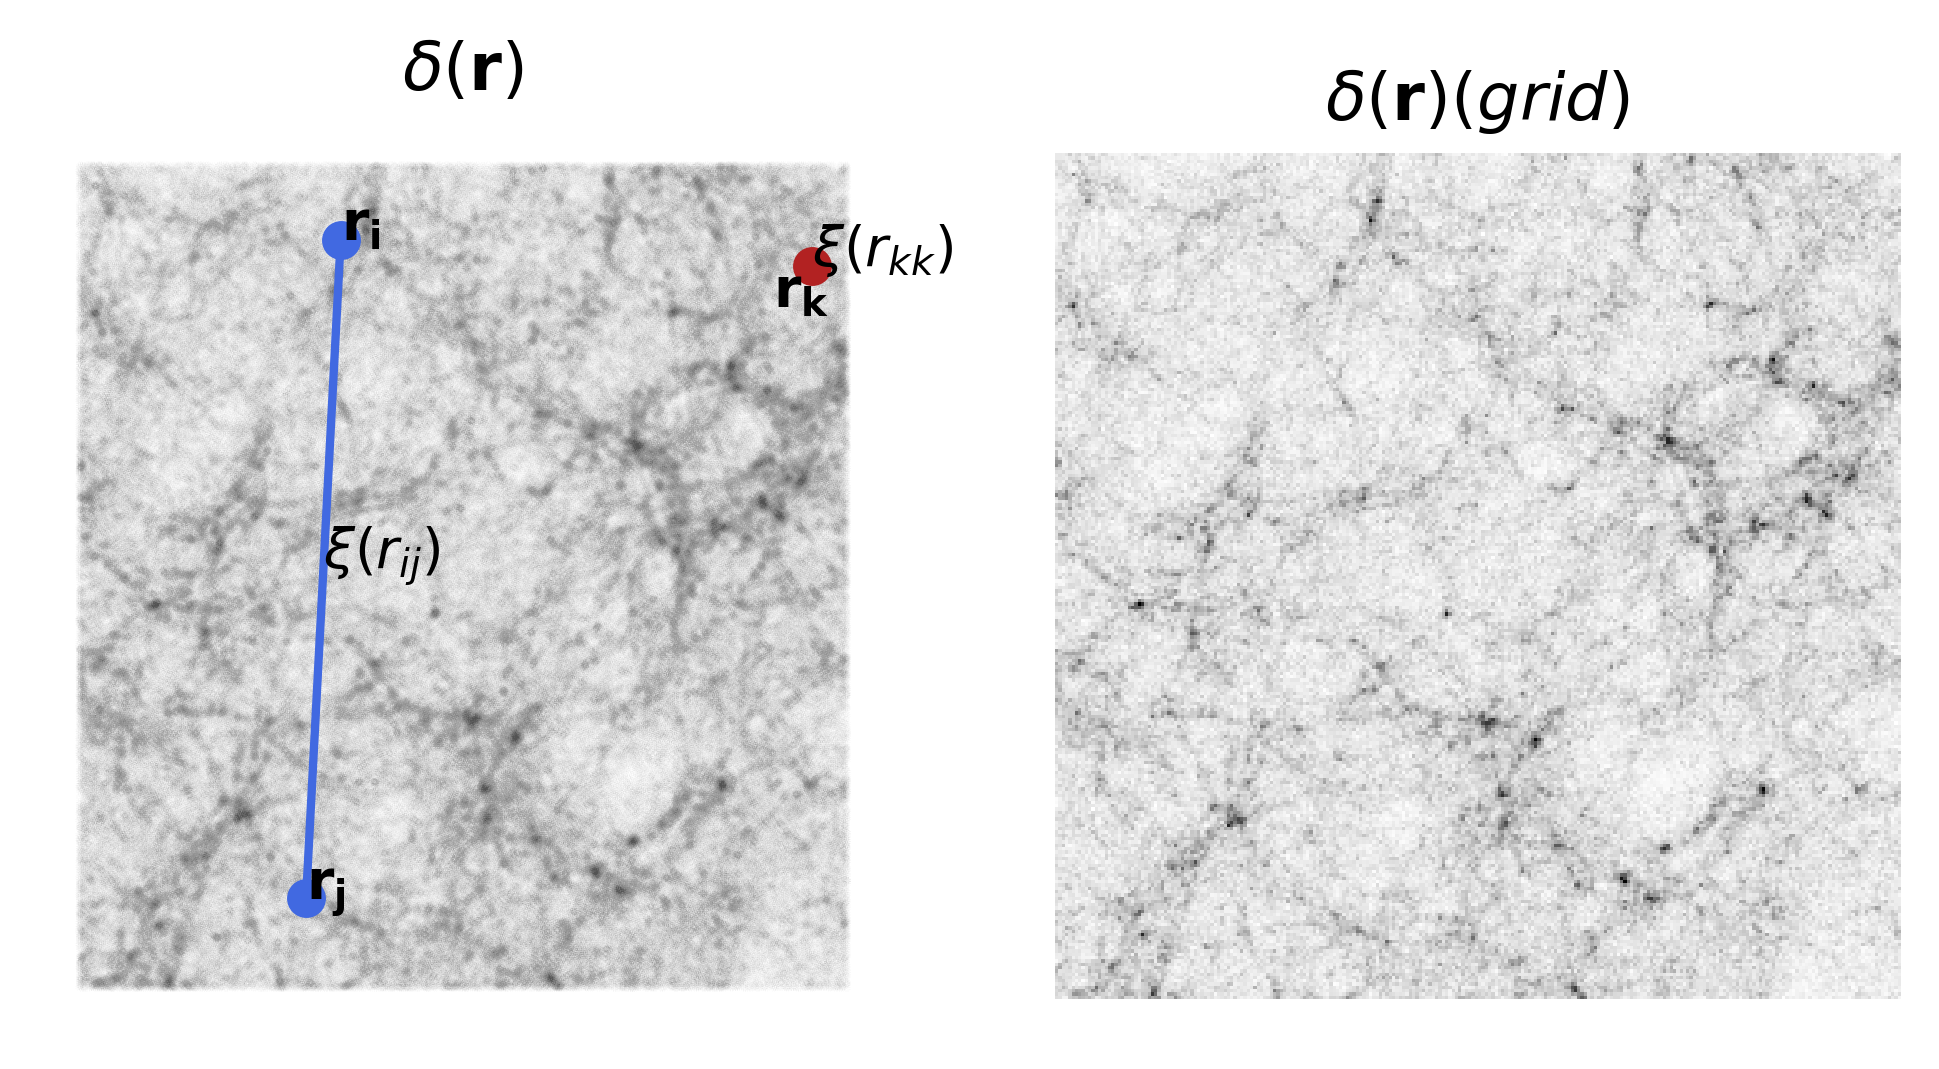

In [6]:
# plot a 2D projection of the 3D density field
x, y, z = cube.T

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=400, figsize=(6.,3.))

# choose random points to illustrate the correlation function
points = np.random.uniform(size=(3,2))
p1, p2, p3 = points

# plot some stuff to illustrate the ideas above
ax1.scatter(x, y, s=0.00001, marker='o', color='k')
ax1.set_title(r'$\delta(\mathbf{r})$')
ax1.text(*p1, s='$\mathbf{r_i}$')
ax1.text(*p2, s='$\mathbf{r_j}$')
ax1.text(*p3, s='$\mathbf{r_k}$')
p3 += 0.05
ax1.text(*p3, s=r'$\xi(r_{kk})$')
ax1.text(x=points[:-1,0].mean(), y=points[:-1,1].mean(), s=r'$\xi(r_{ij})$')
ax1.plot(points[:-1,0], points[:-1,1], color='royalblue', marker='o')
ax1.plot(points[-1,0], points[-1,1], color='firebrick', marker='o')
ax1.axis('off')

ax2.set_title(r'$\delta(\mathbf{r}) (grid)$')
ax2.imshow(np.rot90(grid, 1), cmap='gray_r') # rot90 as images etc are plotted differently....
ax2.axis('off')
plt.show()

### the power spectrum
The power spectrum $P(k)$ measures the magnitude of the clustering of particles at Fourier mode number $k$. 

It is defined as 

$P(k)=\langle |\delta(\mathbf{k})|^2 \rangle_{|\mathbf{k}|=k}$.

It is also the Fourier transform of the correlation function $\xi(\mathbf{r})$ 

$P(\mathbf{k}) = \int \xi(\mathbf{r})\exp(i\mathbf{k}\cdot\mathbf{r})\text{d}^3 r$

$\xi(\mathbf{r}) = \int P(\mathbf{k})\exp(-i\mathbf{k}\cdot\mathbf{r})\frac{\text{d}^3 k}{(2\pi)^3} = \xi(\mathbf{r}) = \int P(\mathbf{k})\exp(-i\mathbf{k}\cdot\mathbf{r})\frac{\text{d}^3 k}{(2\pi)^3}$

It should be noted that in Fourier space, the different wavenumbers $\mathbf{k}$ are statistically independent, so we can register clustering at different scales separately. This is an advantage over the correlation function. This is expressed as 

$\langle \delta(\mathbf{k}) \delta^*(\mathbf{k'}) \rangle = (2\pi)^3\delta_D(\mathbf{k} - \mathbf{k'})P(\mathbf{k})$

mention that the above equation is easier to generalise to higher order statistics

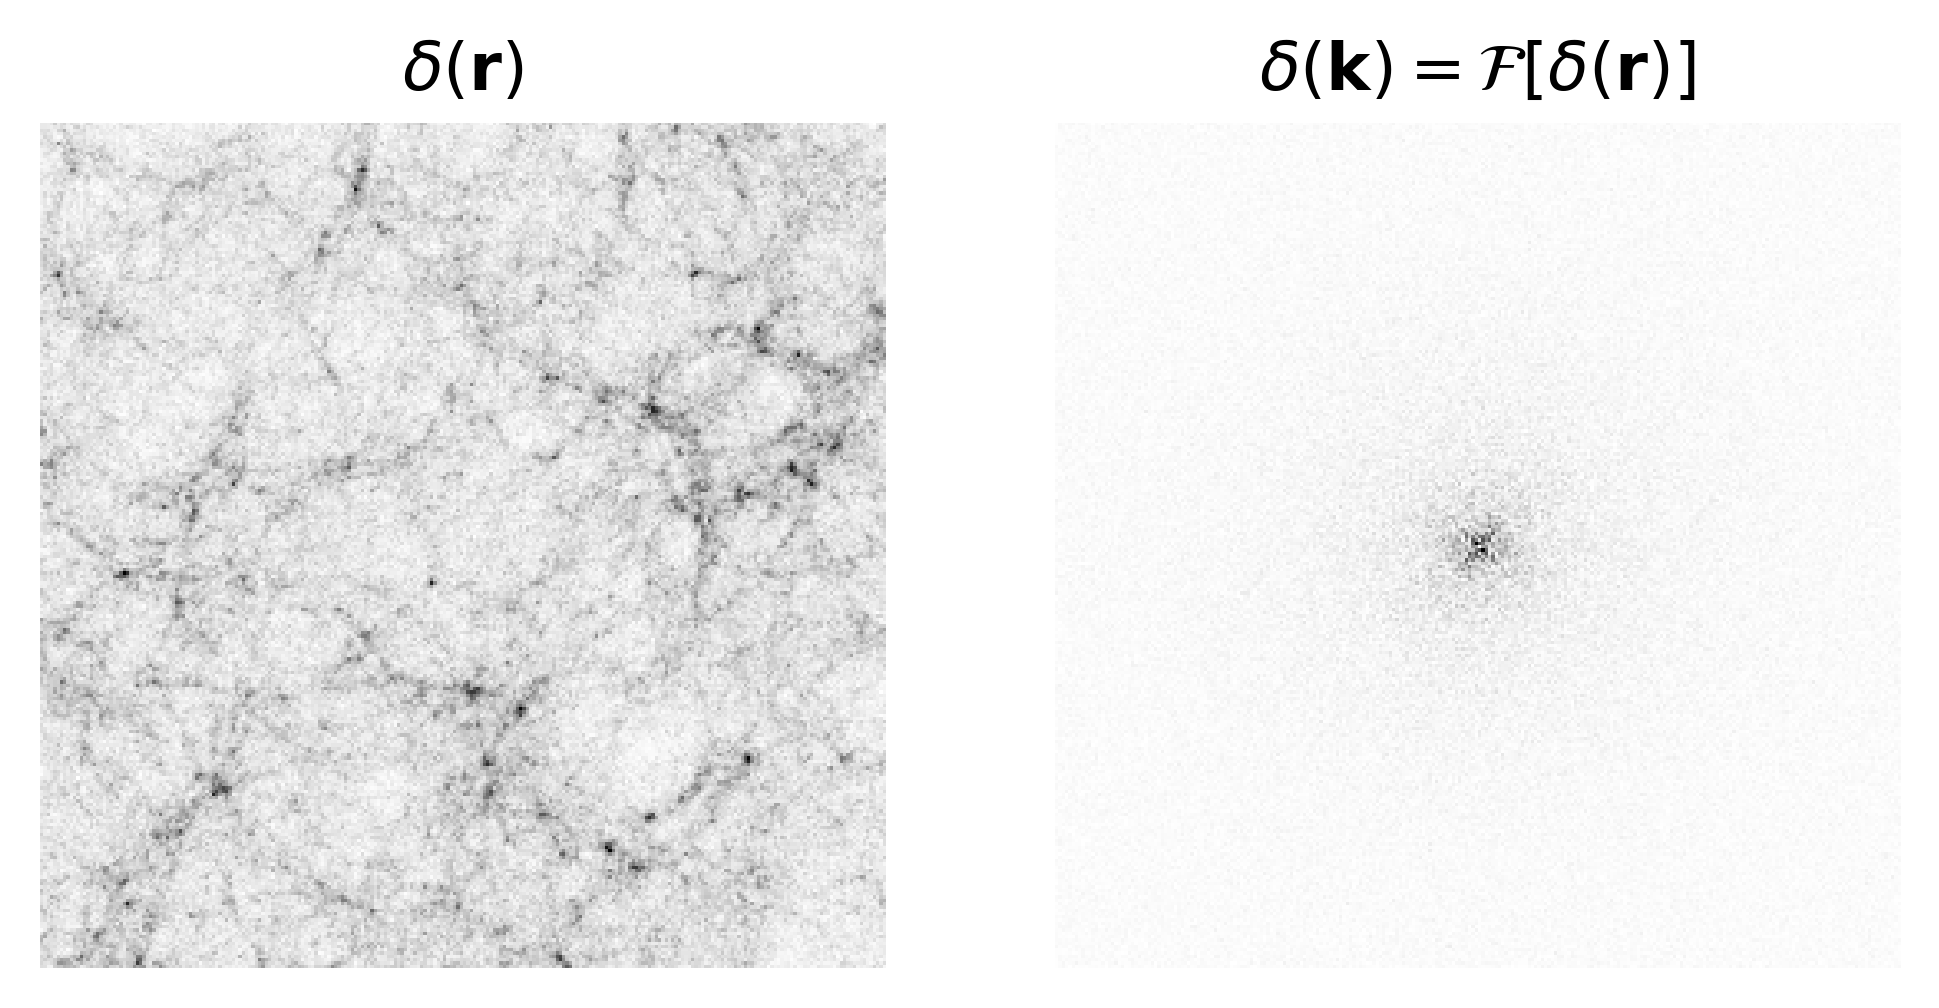

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=400, figsize=(6.,3.))

# fourier transform of overdensity... --> fourier mode
ft_grid = np.abs(np.fft.fftshift(np.fft.fftn(grid)))
# ft_grid = np.abs(np.fft.fftn(grid))

ax1.set_title(r'$\delta(\mathbf{r})$')
ax1.imshow(np.rot90(grid, 1), cmap='gray_r')
ax1.axis('off')

ax2.set_title(r'$\delta(\mathbf{k})=\mathcal{F}\left [\delta(\mathbf{r})\right ]$')
ax2.imshow(ft_grid, cmap='gray_r')
ax2.axis('off')
plt.show()

A very simple example is to fill a three-dimensional density with a regular plane wave, which should result in a single peak in the power spectrum. Here is a simple python scripts that does exactly that.

Computing the two point correlation function should be only one inverse fourier transform of the Power spectrum away. (Depending on which FFT library you use, you might need to renormalize the results. FFTW and numpy.fft for example have unnormalized fourier transforms: $F^{−1}[F[f(x)]=Nf(x)$, where N is the number of samples.)

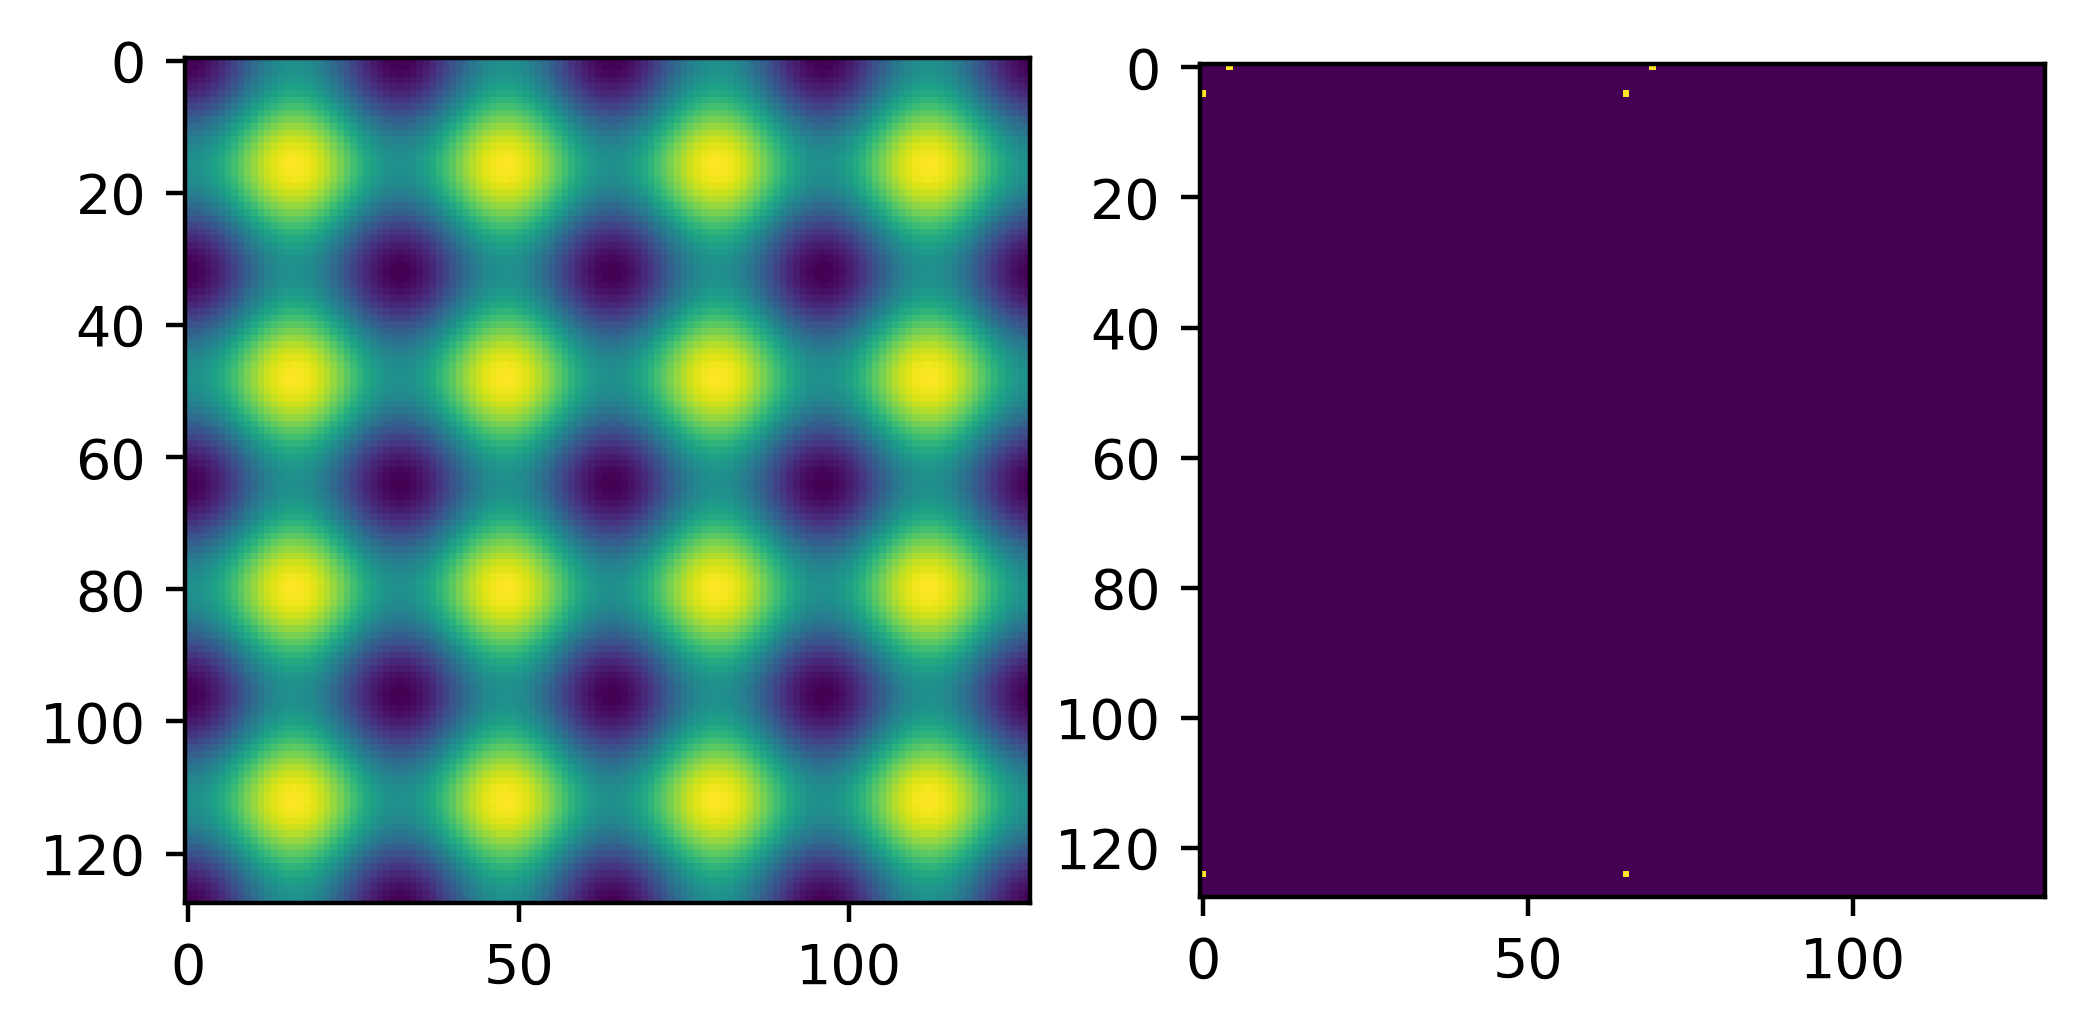

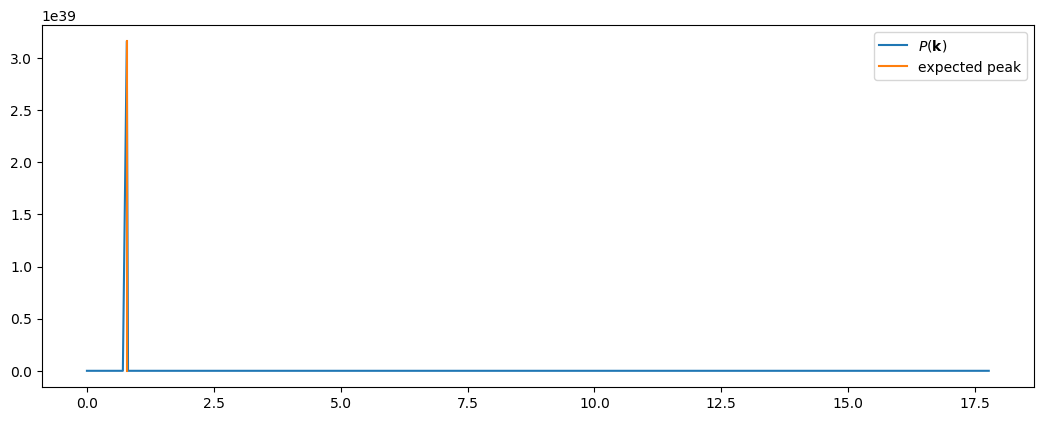

In [8]:
def cosine_wave(freq, x, dx, Lambda):   
    # generate a cosine wave at wavelength Lambda?
    return np.cos(2.0 * np.pi * x * dx / Lambda)

def overdensity(density_field):
    # get overdensity field
    return density_field / density_field.mean() - 1.0

def fourier_transform(overdensity_field):
    return np.abs(np.fft.rfftn(overdensity_field).round())


Npix   = 128                  # define how many cells your box has
Lbox   = 32.0                # define length of box
Lambda = Lbox / 4.0          # define an arbitrary wave length of a plane wave
dx     = Lbox / Npix          # get size of a cell

# create plane wave density field
density_field = np.zeros((Npix, Npix), dtype='float')

for x in range(density_field.shape[0]):
    pixel_density = sum([
        cosine_wave(freq=f, x=x, dx=dx, Lambda=Lambda) for f in range(2)
    ])
    density_field[x,...] = pixel_density

density_field = density_field + density_field.T 

delta = overdensity(density_field)

# get P(k) field: explot fft of data that is only real, not complex
delta_k  = fourier_transform(delta)
Pk_field =  delta_k ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=400, figsize=(6.,3.))
ax1.imshow(delta)
ax2.imshow(np.tile(delta_k, (1,2)))

# get 2d array of index integer distances to k = (0, 0)
dist    = np.minimum(np.arange(Npix), np.arange(Npix, 0, -1))
dist_z  = np.arange(Npix // 2 + 1)
dist   *= dist
dist_z *= dist_z
dist_2d = np.sqrt(dist[:, None] + dist_z)

# get unique distances and index which any distance stored in dist_3d 
# will have in "distances" array
distances, _ = np.unique(dist_2d, return_inverse=True)

# average P(kx, ky, kz) to P(|k|)
Pk = np.bincount(_, weights=Pk_field.ravel()) / np.bincount(_)

# compute "phyical" values of k
dk = 2 * np.pi / Lbox
k = distances * dk

# plot results
fig = plt.figure(figsize=(12.8, 4.8), dpi=100)
ax1 = fig.add_subplot(111)
ax1.plot(k, Pk, label=r'$P(\mathbf{k})$')

# plot expected peak:
# k_peak = 2 * pi/lambda, where we chose lambda for our planar wave earlier
ax1.plot([2 * np.pi / Lambda] * 2, [Pk.min() - 1, Pk.max() + 1], label='expected peak')
ax1.legend()
plt.show()

### the density field on the sphere

The fluctuations in density can be described on the celestial sphere, that we observe here on Earth, by using a sum over a set of *spherical harmonics* in a given coordinate system:

$\delta(\theta, \phi) = \frac{\rho(\theta, \phi) - \bar{\rho}}{\bar{\rho}} = \sum^{\infty}_{l=1}\sum^{m=+l}_{m=-l}a_{l,m}Y_{lm}(\theta, \phi)$.

The $Y_lm(\theta,\phi)$ are spherical harmonic functions that we define in terms of Legendre polynomials $P_{lm}$ using

$Y_{lm}(\theta,\phi) = (-1)^m \sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}P_{lm}(\cos\theta)\text{e}^{im\theta}$.

The complex coefficients $a_{l,m}$ can be written as 

$a_{l,m} = x_{l,m} + iy_{l,m} = |a_{l,m}|\exp (i\phi_{l,m})$.

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0.0, np.pi, 200)
theta = np.linspace(0.0, 2.0 * np.pi, 200)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

fig = plt.figure(figsize=plt.figaspect(1.), dpi=400)

Nplt = 8
c = 1
for i in range(Nplt):
    for j in range(Nplt):
        m, l = i, j + 1
        
        # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
        fcolors = sph_harm(m, l, theta, phi).real
        fcolors = (fcolors - fcolors.min()) / (fcolors.max() - fcolors.min())
        
        ax = fig.add_subplot(Nplt, Nplt, c, projection='3d')
        ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
        ax.axis('off')
        ax.dist = 6.0
        c += 1 
        
plt.show()

C:\Users\jedhm\Anaconda3\envs\my_conda\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


KeyboardInterrupt: 

The fluctuations $\delta$ are real, so the definitions above require that, if $m$ is odd then

$x_{l,m} = \Re(a_{l,m}) = -\Re(a_{l,-m}) = -x_{l,-m}$,

$y_{l,m} = \Im(a_{l,m}) = \Im(a_{l,-m}) = y_{l,-m}$,

and if $m$ is even

$x_{l,m} = \Re(a_{l,m}) = \Re(a_{l,-m}) = x_{l,-m}$,

$y_{l,m} = \Im(a_{l,m}) = -\Im(a_{l,-m}) = y_{l,-m}$,

and if $m$ is zero then 

$\Im(a_{l,m}) = y_{l,0} = 0$

At the $m=0$ the mode always has zero phase so there are only $l$ independent phase angles describing the harmonic modes at a given $l$. We can restrict to $m \geq 0$ without loss of information.


If the density fluctuations form a Gaussian random field in space then the overdensity variations on the celestial sphere form a random Gaussian field over the sphere. This means that 

$\langle a_{l,m}a^*_{l,m}=C_l \delta^K_{ll'} \delta^K_{mm'}$

where $C_l$ is the angular power spectrum and $\delta^K_{ii'}$ is the Kronecker delta function. Since the phases are random, the stochastic properties of a statistically homogeneous and isotropic Gaussian random field are fully specified by the $C_l$. The angular power spectrum determines the variance of the real and imaginary parts of $a_{l,m}$ which are both Gaussian

$\sigma^2(x_{l,m}) = \sigma^2(y_{l,m}) = \sigma^2_l = \frac{1}{2}C_l$

#### the `healpy` library

In [10]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

URL transformed to HTTPS due to an HSTS policy
--2021-10-11 15:46:34--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 2001:4d0:2310:150::68, 129.164.179.68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|2001:4d0:2310:150::68|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2021-10-11 15:46:35 ERROR 403: Forbidden.

URL transformed to HTTPS due to an HSTS policy
--2021-10-11 15:46:35--  https://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits
Reusing existing connection to [lambda.gsfc.nasa.gov]:443.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!pip install healpy

In [ ]:
import healpy as hp
# https://emfollow.docs.ligo.org/userguide/tutorial/skymaps.html

hpx = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits") # h=True, verbose=False

hp.mollview(hpx)

Npix = len(hpx)
sky_area = 4 * 180 ** 2 / np.pi
print("resolution", sky_area / Npix)

nside = hp.npix2nside(npix)

ipix = 123
theta, phi = hp.pix2ang(nside, ipix)
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)
print("pixel %d has RA,Dec: " % (ipix, ra, dec))

ra = 194.95
dec = 27.98
theta = 0.5 * np.pi - np.deg2rad(dec)
phi = np.deg2rad(ra)
ipix = hp.ang2pix(nside, theta, phi)
print("pixel %d has RA,Dec: " % (ipix, ra, dec))

In [ ]:
def cosine_wave(freq, x, dx, Lambda):    
    return np.cos(freq * 2.0 * np.pi * x * dx / Lambda)


def upsample(x, factor):
    return x.repeat(factor, axis=0).repeat(factor, axis=1).repeat(factor, axis=2)


def overdensity(density_field):
    # get overdensity field
    return density_field / density_field.mean() - 1.0


def fourier_transform(overdensity_field):
    return np.abs(np.fft.rfftn(overdensity_field).round())


Npix   = 64                  # define how many cells your box has
Lbox   = 50.0                # define length of box
Lambda = Lbox / 4.0          # define an arbitrary wave length of a plane wave
dx     = Lbox / Npix          # get size of a cell

# create plane wave density field
density_field = np.zeros((Npix, Npix, Npix), dtype='float')

for x in range(density_field.shape[0]):
    pixel_density = sum([
        cosine_wave(freq=1.0, x=x, dx=dx, Lambda=Lambda)
    ])
    density_field[x,...] = pixel_density

dn = 8
noise = np.random.uniform(size=(Npix // dn, Npix // dn, Npix // dn))
density_field += upsample(noise, factor=dn)

plot_3d(density_field)

delta = overdensity(density_field)

# get P(k) field: explot fft of data that is only real, not complex
delta_k  = fourier_transform(delta)
Pk_field =  delta_k ** 2

# get 3d array of index integer distances to k = (0, 0, 0)
dist    = np.minimum(np.arange(Npix), np.arange(Npix, 0, -1))
dist_z  = np.arange(Npix // 2 + 1)
dist   *= dist
dist_z *= dist_z
dist_3d = np.sqrt(dist[:, None, None] + dist[:, None] + dist_z)

# get unique distances and index which any distance stored in dist_3d 
# will have in "distances" array
distances, _ = np.unique(dist_3d, return_inverse=True)

# average P(kx, ky, kz) to P(|k|)
Pk = np.bincount(_, weights=Pk_field.ravel()) / np.bincount(_)

# compute "phyical" values of k
dk = 2 * np.pi / Lbox
k = distances * dk

# plot results
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax1.plot(k, Pk, label=r'$P(\mathbf{k})$')

# plot expected peak:
# k_peak = 2 * pi/lambda, where we chose lambda for our planar wave earlier
ax1.plot([2 * np.pi / Lambda] * 2, [Pk.min() - 1, Pk.max() + 1], label='expected peak')
ax1.legend()
plt.show()


In [ ]:
# plot a 2D plane wave

def get_wave(x, y, n=3):
    phi = np.arctan(y, x)
    amp = (xs ** 2 + ys ** 2) ** (0.5) * (np.cos(phi) + 1j * np.sin(phi))
    amp = np.abs(amp) ** 2
    return amp

x = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 200)
y = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 200)
xs, ys = np.meshgrid(x, y) 

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200, figsize=(6.,3.))

ax1.imshow(get_wave(x, y))
ax1.axis('off')

xs = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 200)
ys = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 200)
xs, ys = np.meshgrid(xs, ys) 


phi = np.arctan(y, x)
r   = (xs ** 2 + ys ** 2) ** (0.5)
amp = r * (np.cos(phi) + 1j * np.sin(phi))
ft  = np.fft.ifftn(amp)
amp = np.abs(amp) ** 2

ax2.imshow(amp)
ax2.axis('off')
plt.show()

In [ ]:
Nplt = 16

fig, axs = plt.subplots(nrows=Nplt, ncols=Nplt, figsize=(6.,6.), dpi=400)

Npix = 40
X = np.linspace(-2.0, 2.0, Npix)
Y = np.linspace(-2.0, 2.0, Npix)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, sigma):
    """Return the multivariate Gaussian distribution on array pos."""
    n = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    N = np.sqrt((2.0 * np.pi) ** n * sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos - mu, sigma_inv, pos - mu)
    # fac = np.linalg.multi_dot([(pos - mu).T, sigma_inv, pos - mu])
    return np.exp(-1.0 * fac / 2.0) / N

for i in range(Nplt):
    for j in range(Nplt):
        mu = np.zeros((2))
        sigma = np.eye(2) 
        sigma[0,1], sigma[1,0] = np.random.uniform(low=-1.0, high=1.0, size=(2))
        Z = multivariate_gaussian(pos, mu, sigma)
        axs[i,j].imshow(Z)
        axs[i,j].axis('off')
        
plt.tight_layout()        
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()